# Project: Create a Convolutional Neural Network
- We will create a model on the [CIFAR-10 dataset](https://www.cs.toronto.edu/%7Ekriz/cifar.html)

### Step 1: Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Download the CIFAR10 dataset
- Excute the cell below

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 136s 1us/step


### Step 3: Normalize the pixels
- Divide the **train_images** and **test_images** with 255 to normalize them between 0 and 1.

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Step 4: Get the class names of the labels
- Make a class name conversion.
    - HINT: make a list with the name **class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']**
- How to use the name conversion.
    - **class_names[int(train_labels[index])]**
- How to show an image
    - **plt.imshow(train_images[index])**

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

'truck'

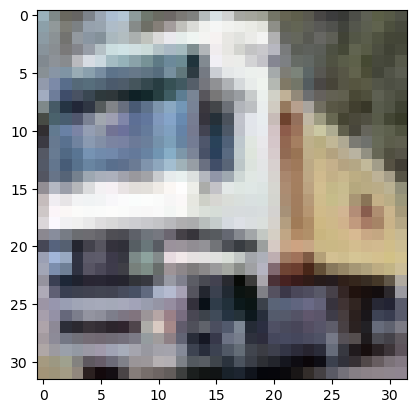

In [5]:
index = 1
plt.imshow(train_images[index])
class_names[int(train_labels[index])]

### Step 5: Create a model
- Create a **Sequential** model
    - **Conv2D** with 32 and (3, 3),  **activation='relu', input_shape=(32, 32, 3)**
    - **MaxPooling2D** with (2, 2)
    - **Conv2D** with 64 and (3, 3),  **activation='relu'**
    - **MaxPooling2D** with (2, 2)
    - **Conv2D** with 64 and (3, 3),  **activation='relu'**
    - **Flatten**
    - **Dense** with 64 nodes with **input_dim=4, activaition='relu'**
    - **Dense** with 10 (the output node)**
- Complie the model with **optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']**

In [6]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, input_dim=4, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Step 6: Train the model
- Fit the model with **train_images, train_labels, epochs=10** and **validation_data=(test_images, test_labels)**

In [7]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 158s 94ms/step - loss: 1.5443 - accuracy: 0.4351 - val_loss: 1.2495 - val_accuracy: 0.5581
Epoch 2/10
1563/1563 [==============================] - 142s 91ms/step - loss: 1.1658 - accuracy: 0.5890 - val_loss: 1.1194 - val_accuracy: 0.5980
Epoch 3/10
1563/1563 [==============================] - 118s 76ms/step - loss: 1.0163 - accuracy: 0.6424 - val_loss: 1.0390 - val_accuracy: 0.6301
Epoch 4/10
1563/1563 [==============================] - 104s 66ms/step - loss: 0.9226 - accuracy: 0.6768 - val_loss: 0.9504 - val_accuracy: 0.6652
Epoch 5/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8554 - accuracy: 0.7003 - val_loss: 0.9459 - val_accuracy: 0.6717
Epoch 6/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.7975 - accuracy: 0.7208 - val_loss: 0.8979 - val_accuracy: 0.6903
Epoch 7/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.7472 - accuracy: 0.7384 - val_loss: 0.92

### Stpe 7: Test the model
- Make predictions
    - assign the predictions of test_images to a variable
- How to test visually
    - Assign **index=0**
    - Plot the image with **plt.imshow(test_images[index])**
    - See the label from prediction by mapping it from **class_names**

In [8]:
y_pred = model.predict(test_images)

313/313 [==============================] - 4s 12ms/step


'truck'

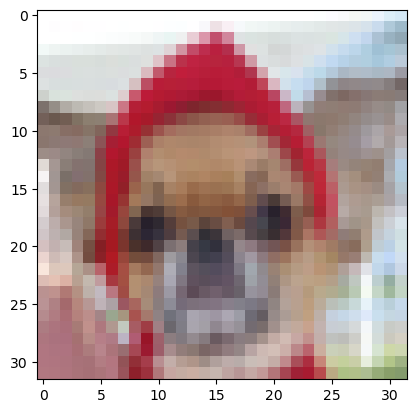

In [9]:
index = 168
plt.imshow(test_images[index])
class_names[y_pred[index].argmax()]

In [10]:
model.evaluate(test_images, test_labels, verbose=0)

[0.8318212628364563, 0.7192999720573425]

### Step 8 (Optional): Improve the model
- Try to play around with the model to improve the score

In [11]:
model = Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, input_dim=4, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 107s 68ms/step - loss: 1.4990 - accuracy: 0.4556 - val_loss: 1.2412 - val_accuracy: 0.5513
Epoch 2/10
1563/1563 [==============================] - 103s 66ms/step - loss: 1.1454 - accuracy: 0.5963 - val_loss: 1.0930 - val_accuracy: 0.6166
Epoch 3/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.9931 - accuracy: 0.6515 - val_loss: 1.0019 - val_accuracy: 0.6556
Epoch 4/10
1563/1563 [==============================] - 101s 64ms/step - loss: 0.8940 - accuracy: 0.6856 - val_loss: 0.9238 - val_accuracy: 0.6812
Epoch 5/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.8178 - accuracy: 0.7134 - val_loss: 0.9965 - val_accuracy: 0.6623
Epoch 6/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.7575 - accuracy: 0.7355 - val_loss: 0.8827 - val_accuracy: 0.7007
Epoch 7/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.7024 - accuracy: 0.7531 - val_loss: 0

In [13]:
y_pred = model.predict(test_images)

313/313 [==============================] - 6s 18ms/step


'dog'

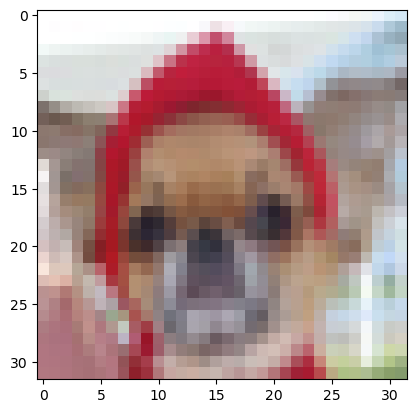

In [14]:
index = 168
plt.imshow(test_images[index])
class_names[y_pred[index].argmax()]

In [15]:
model.evaluate(test_images, test_labels, verbose=0)

[0.8556951284408569, 0.7228999733924866]